# Summary
Testing the pipeline for the 12 autoencoder. Similar to `3.0`

In [1]:
!nvidia-smi

Mon Dec 18 12:14:50 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti     Off | 00000000:06:00.0 Off |                  N/A |
|  0%   39C    P8               9W / 165W |     20MiB / 16380MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import re
import random
import torch
import numpy as np

os.chdir('/home/david/Desktop/projects/thesis/upstream_seq2seq/')

# from executors.train_on_local_machine_mps import trainer
from executors.train_on_local_machine import trainer

scrutiny_probs =[None]*16+\
                ['Turn-off']*50+\
                ['MA']*4+\
                ['BW']*4+\
                ['EM']*4+\
                ['MA+BW']*4+\
                ['MA+EM']*4+\
                ['BW+EM']*4+\
                ['MA+BW+EM']*10

seed_val = 123
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


config = {
    # general
    'seed': seed_val,
    'data_folder_path': './data/processed/',
    # training,
    'batch_size': 32,
    'n_epochs': 30,
    # architecture - to be changed later and pushed out towards tuning,
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  256,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 16,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'decoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'window': 450 ,
    'train_by_sample': 1,
    'positional_encodings': False,
    'n_iters':  None,                      # plot intermediate results on validation every <n_iters> steps,
    'model_type': "encoder_cnn",
    'saving_path': './models/transformer_cnn_v1',
    'plot_saving_path': './plots/transformer_cnn_v1',
    'scrutiny_probs': scrutiny_probs,
}

trainer(**config)


/home/david/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm




training using device: cuda


Num attention heads: 16


/home/david/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


The model has 4,235,800 trainable parameters
TSTransformerEncoderCNN(
  (project_input): Linear(in_features=12, out_features=256, bias=True)
  (encoder): Linear(in_features=12, out_features=256, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-7): 8 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
    )
  )
  (output_layer): Linear(in_features=256, out_features=12, bias=True)
  (drop

Within epoch loss (training) 0.06377:  23%|██▎       | 291/1291 [05:24<18:35,  1.12s/it]


FileNotFoundError: [Errno 2] No such file or directory: './data/processed/splits.pkl_LI_splits.pkl.npy'

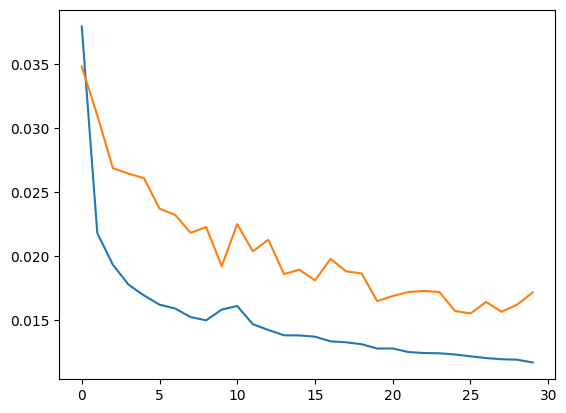

In [ ]:
import pickle
import matplotlib.pyplot as plt
with open('./models/transformer_cnn_4heads_loss.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
plt.plot(loaded_dict['train'])
plt.plot(loaded_dict['validation'])
plt.show()